# Kernel Approximation

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/A_Z Handwritten Data.csv', header=None)
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
132703,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
338134,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73395,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
248813,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
111337,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_sample = df.sample(frac=0.05).reset_index(drop=True)

In [4]:
df_sample.shape

(18623, 785)

In [5]:
df_sample[0].unique()

array([19, 22,  2, 18, 21,  9, 13, 23, 12,  0,  7, 20, 10, 14, 15, 16,  6,
       24, 25,  1, 11,  5, 17,  3,  4,  8])

In [6]:
LOOKUP = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E',
          5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J',
          10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O',
          15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T',
          20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}

In [7]:
def display_image(features, actual_label):
    print('Actual Label: ', LOOKUP[actual_label])
    plt.imshow(features.reshape(28, 28), cmap='Greys')
    plt.show()

In [8]:
X = df_sample[df_sample.columns[1:]]
Y = df_sample[0]

In [9]:
Y.loc[5]

9

In [10]:
X.loc[5].values[100:650]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  18, 125, 187,  55,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  26, 139, 252, 177,  25,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  10, 112, 248, 199,  61,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   3, 101, 245, 212,  88,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  67, 198, 212,
        88,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  65,
       195, 213,  91,   0,   0,   0,   0,   0,   0,   0,   0,   

Actual Label:  E


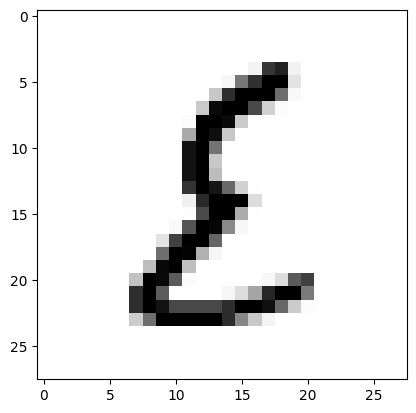

In [11]:
display_image(X.loc[300].values, Y.loc[300])

In [12]:
X = X/255.
X = X - X.mean(axis=0)

In [13]:
X.loc[100].values[144:154]

array([-0.02547914, -0.05001406, -0.07524219, -0.09882951, -0.12896387,
       -0.16435106, -0.20697577, -0.25234009, -0.23777618, -0.1646446 ])

In [14]:
n_samples = len(df_sample)
n_samples

18623

In [15]:
x_train, y_train = (X[:n_samples // 2],
                    Y[:n_samples // 2])

x_test, y_test = (X[n_samples // 2:],
                  Y[n_samples // 2:])

In [16]:
x_train.shape, y_train.shape

((9311, 784), (9311,))

In [17]:
from time import time
from sklearn import svm, pipeline
from sklearn.kernel_approximation import Nystroem, RBFSampler

In [18]:
kernel_svm = svm.SVC(gamma=0.01)

linear_svm = svm.LinearSVC(max_iter=1500)

In [19]:
rbf_approx_svm = pipeline.Pipeline([
    ('rbf_sampler', RBFSampler(gamma=0.01,random_state=1)),
    ('svm', svm.LinearSVC())
])

In [20]:
nystroem_approx_svm = pipeline.Pipeline([
    ('nystroem', Nystroem(gamma=0.01,random_state=1)),
    ('svm', svm.LinearSVC())
])

In [21]:
start = time()

kernel_svm.fit(x_train, y_train)
kernel_svm_score = kernel_svm.score(x_test, y_test)

kernel_svm_time = time() - start

print('Score: ', kernel_svm_score)
print('Runtime: ', kernel_svm_time)

Score:  0.9184922680412371
Runtime:  42.7976496219635


In [23]:
start = time()

linear_svm.set_params(C=0.1)
linear_svm.fit(x_train, y_train)
linear_svm_score = linear_svm.score(x_test, y_test)

linear_svm_time = time() - start

print('Score: ', linear_svm_score)
print('Runtime: ', linear_svm_time)

/home/gauravjain/projects/sci-kit/scilib/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Score:  0.8111039518900344
Runtime:  6.183257579803467


In [24]:
start = time()

rbf_approx_svm.set_params(rbf_sampler__n_components=len(x_train))
rbf_approx_svm.set_params(svm__C=0.1)

rbf_approx_svm.fit(x_train, y_train)
rbf_approx_svm_score = rbf_approx_svm.score(x_test, y_test)

rbf_approx_svm_time = time() - start

print('Score: ', rbf_approx_svm_score)
print('Runtime: ', rbf_approx_svm_time)

/home/gauravjain/projects/sci-kit/scilib/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Score:  0.8591065292096219
Runtime:  41.6001877784729


In [25]:
start = time()

nystroem_approx_svm.set_params(nystroem__n_components=len(x_train))
nystroem_approx_svm.set_params(svm__C=0.1)

nystroem_approx_svm.fit(x_train, y_train)
nystroem_approx_svm_score = nystroem_approx_svm.score(x_test, y_test)

nystroem_approx_svm_time = time() - start

print('Score: ', nystroem_approx_svm_score)
print('Runtime: ', nystroem_approx_svm_time)

/home/gauravjain/projects/sci-kit/scilib/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Score:  0.8610395189003437
Runtime:  499.1192443370819


In [26]:
start = time()

rbf_approx_svm.set_params(rbf_sampler__n_components=len(x_train))
rbf_approx_svm.set_params(svm__C=1)

rbf_approx_svm.fit(x_train, y_train)
rbf_approx_svm_score = rbf_approx_svm.score(x_test, y_test)

rbf_approx_svm_time = time() - start

print('Score: ', rbf_approx_svm_score)
print('Runtime: ', rbf_approx_svm_time)

/home/gauravjain/projects/sci-kit/scilib/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Score:  0.9203178694158075
Runtime:  53.33875918388367


In [27]:
start = time()

nystroem_approx_svm.set_params(nystroem__n_components=len(x_train))
nystroem_approx_svm.set_params(svm__C=1)

nystroem_approx_svm.fit(x_train, y_train)
nystroem_approx_svm_score = nystroem_approx_svm.score(x_test, y_test)

nystroem_approx_svm_time = time() - start

print('Score: ', nystroem_approx_svm_score)
print('Runtime: ', nystroem_approx_svm_time)

/home/gauravjain/projects/sci-kit/scilib/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Score:  0.9219286941580757
Runtime:  528.6330313682556


## Run times based on varying sample sizes

In [37]:
sample_sizes = 300 * np.arange(1, 7)
sample_sizes

array([ 300,  600,  900, 1200, 1500, 1800])

In [30]:
rbf_scores = []
nystroem_scores = []

rbf_times = []
nystroem_times = []

In [31]:
for D in sample_sizes:

    rbf_approx_svm.set_params(rbf_sampler__n_components=D)
    nystroem_approx_svm.set_params(nystroem__n_components=D)

    start = time()
    nystroem_approx_svm.fit(x_train, y_train)
    nystroem_times.append(time() - start)

    start = time()
    rbf_approx_svm.fit(x_train, y_train)
    rbf_times.append(time() - start)

    rbf_score = rbf_approx_svm.score(x_test, y_test)
    nystroem_score = nystroem_approx_svm.score(x_test, y_test)

    nystroem_scores.append(nystroem_score)
    rbf_scores.append(rbf_score)

/home/gauravjain/projects/sci-kit/scilib/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/gauravjain/projects/sci-kit/scilib/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/gauravjain/projects/sci-kit/scilib/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/gauravjain/projects/sci-kit/scilib/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` expli

In [32]:
rbf_scores

[0.8404209621993127,
 0.8788659793814433,
 0.8899269759450171,
 0.9012027491408935,
 0.9038874570446735,
 0.9074312714776632]

In [33]:
rbf_times

[1.9572510719299316,
 3.3432300090789795,
 5.093496799468994,
 6.816396713256836,
 8.200482845306396,
 9.747249126434326]

In [34]:
nystroem_scores

[0.8754295532646048,
 0.8925042955326461,
 0.9000214776632303,
 0.9050687285223368,
 0.9079682130584192,
 0.9110824742268041]

In [35]:
nystroem_times

[2.23354434967041,
 3.736013889312744,
 5.725640773773193,
 7.73583722114563,
 10.003558874130249,
 12.598873853683472]

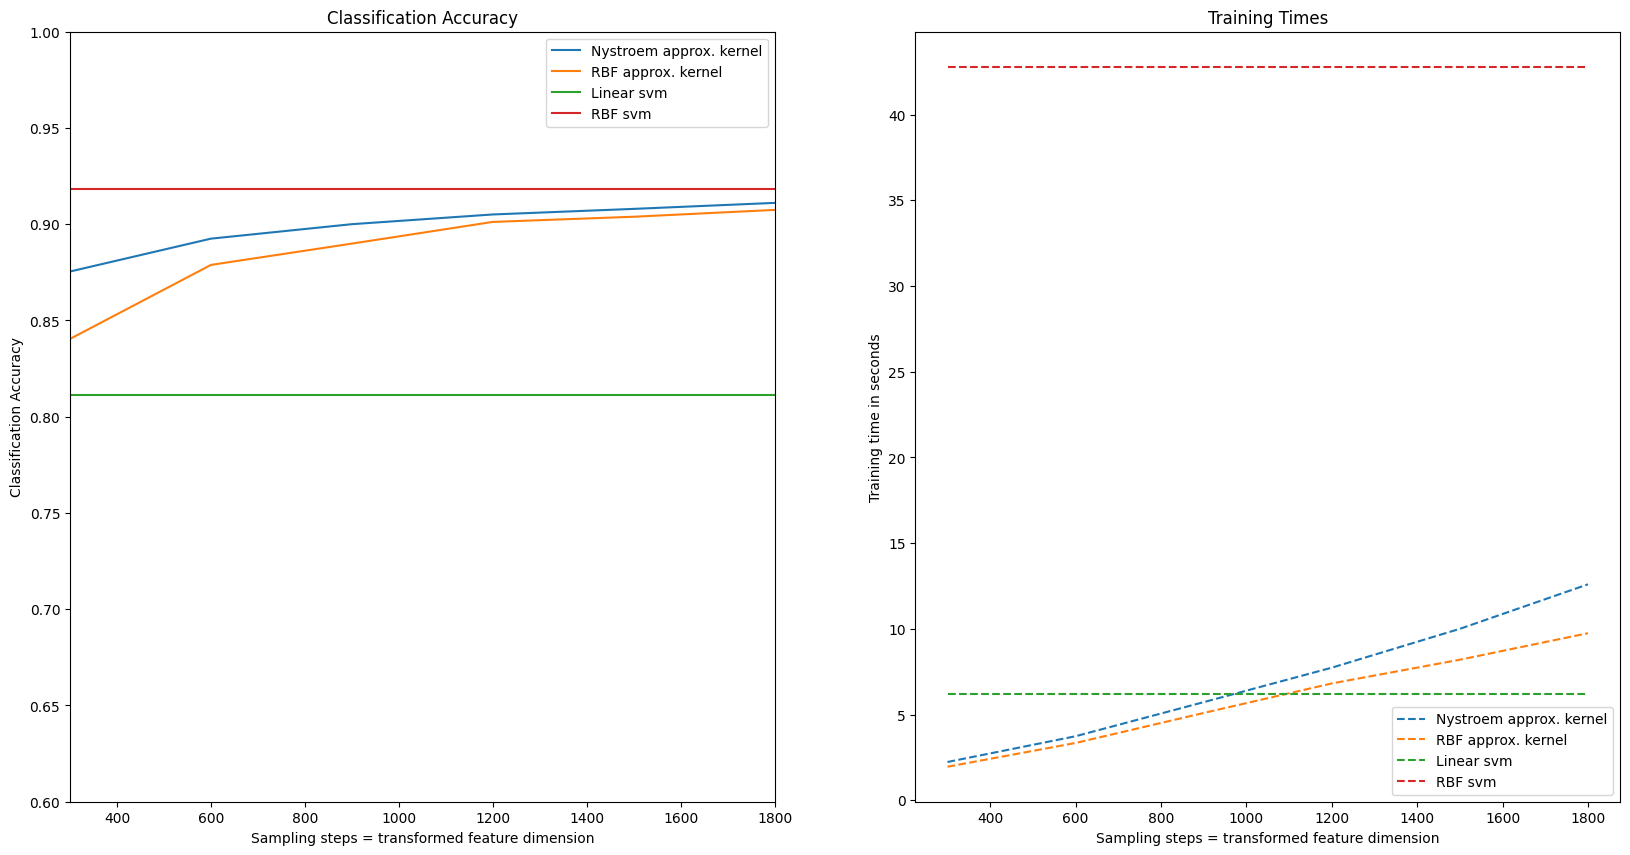

In [36]:
plt.figure(figsize=(20,10))

accuracy = plt.subplot(121)
timescale = plt.subplot(122)

accuracy.plot(sample_sizes, nystroem_scores, label='Nystroem approx. kernel')
timescale.plot(sample_sizes, nystroem_times, '--', label='Nystroem approx. kernel')

accuracy.plot(sample_sizes, rbf_scores, label='RBF approx. kernel')
timescale.plot(sample_sizes, rbf_times, '--', label='RBF approx. kernel')

accuracy.plot([sample_sizes[0], sample_sizes[-1]],
              [linear_svm_score, linear_svm_score], label='Linear svm')
timescale.plot([sample_sizes[0], sample_sizes[-1]],
               [linear_svm_time, linear_svm_time], '--', label='Linear svm')

accuracy.plot([sample_sizes[0], sample_sizes[-1]],
              [kernel_svm_score, kernel_svm_score], label='RBF svm')
timescale.plot([sample_sizes[0], sample_sizes[-1]],
               [kernel_svm_time, kernel_svm_time], '--', label='RBF svm')

accuracy.set_title('Classification Accuracy')
timescale.set_title('Training Times')

accuracy.set_xlim(sample_sizes[0], sample_sizes[-1])
accuracy.set_ylim(0.6, 1)

accuracy.set_xlabel('Sampling steps = transformed feature dimension')
timescale.set_xlabel('Sampling steps = transformed feature dimension')

accuracy.set_ylabel('Classification Accuracy')
timescale.set_ylabel('Training time in seconds')

accuracy.legend(loc='best')
timescale.legend(loc='best')

plt.show()